In [1]:
# Colab default version is now 2.x, so uninstall it and install v1.14
%tensorflow_version 2.x
!pip uninstall -y tensorflow tensorboard tensorflow-estimator tensorboard-plugin-wit
!pip install tensorflow-gpu==1.14.0 tensorboard==1.14.0 tensorflow-estimator==1.14.0 
#!pip install tensorboard-plugin-wit==1.6.0.post3b

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Found existing installation: tensorboard 2.8.0
Uninstalling tensorboard-2.8.0:
  Successfully uninstalled tensorboard-2.8.0
Found existing installation: tensorflow-estimator 2.8.0
Uninstalling tensorflow-estimator-2.8.0:
  Successfully uninstalled tensorflow-estimator-2.8.0
Found existing installation: tensorboard-plugin-wit 1.8.1
Uninstalling tensorboard-plugin-wit-1.8.1:
  Successfully uninstalled tensorboard-plugin-wit-1.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377.1 MB 8.6 kB/s 
     |████████████████████████████████| 3.1 MB 32.6 MB/s 
     |████████████████████████████████| 488 kB 47.9 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 


In [2]:
# Install necessary libraries
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q pillow lxml jupyter matplotlib cython pandas contextlib2
!pip install -q pycocotools tf_slim

Selecting previously unselected package python-bs4.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [3]:
# Repo URL
repo_url = 'https://github.com/camizqu/try2'

## Number of training and evaluation steps (override the setup in .config)
## Do not use these parameters as the lerning rate strategy would be different between models
# num_steps = 10000
# num_eval_steps = 500

# Models
MODELS_CONFIG = {
    'ssd_mobilenet_v1_coco_2018_01_28': {
        'model_name': 'ssd_mobilenet_v1_coco_2018_01_28',
        'model_path': '/pre-trained-models/ssd_mobilenet_v1_coco_2018_01_28',
        'pipeline_file': '/pipeline.config',
        'batch_size': 32
    },
    'faster_rcnn_resnet50_coco_2018_01_28': {
        'model_name': 'faster_rcnn_resnet50_coco_2018_01_28',
        'model_path': '/pre-trained-models/faster_rcnn_resnet50_coco_2018_01_28',
        'pipeline_file': '/pipeline.config',
        'batch_size': 1
    },
        'mask_rcnn_inception_v2_coco_2018_01_28': {
        'model_name': 'mask_rcnn_inception_v2_coco_2018_01_28',
        'model_path': '/pre-trained-models/mask_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': '/pipeline.config',
        'batch_size': 16
    },
        'rfcn_resnet101_coco_2018_01_28': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'model_path': '/pre-trained-models/rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': '/pipeline.config',
        'batch_size': 1
    },
}

# Select a model to use.
selected_model = 'rfcn_resnet101_coco_2018_01_28'

model_name = MODELS_CONFIG[selected_model]['model_name']
model_path = MODELS_CONFIG[selected_model]['model_path']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [4]:
import os

# Set Repository Home Directory
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

# Clone
!git clone {repo_url}

# Pull
%cd {repo_dir_path}
!git pull

Cloning into 'try2'...
remote: Enumerating objects: 811, done.
remote: Counting objects: 100% (811/811), done.
remote: Compressing objects: 100% (403/403), done.
remote: Total 811 (delta 414), reused 773 (delta 385), pack-reused 0
Receiving objects: 100% (811/811), 24.89 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (414/414), done.
/content/try2
Already up to date.


In [5]:
# Set Label Map (.pbtxt) path and pipeline.config path
label_map_pbtxt_fname = repo_dir_path + '/annotations/label_map.pbtxt'
pipeline_fname = repo_dir_path + model_path + pipeline_file

assert os.path.isfile(label_map_pbtxt_fname), '`{}` not exist'.format(label_map_pbtxt_fname)
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [6]:
# Check pipeline config - update if required
!cat {pipeline_fname}

model {
  faster_rcnn {
    num_classes: 2
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 300
        max_dimension: 300
      }
    }
    feature_extractor {
      type: "faster_rcnn_resnet101"
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        height_stride: 16
        width_stride: 16
        scales: 0.25
        scales: 0.5
        scales: 1.0
        scales: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 1.0
        aspect_ratios: 2.0
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_normal_initializer {
          stddev: 0.00999999977648
        }
      }
    }
    first_stage_nms_score_threshold: 0.0
    first_stage_nms_iou_threshold: 0.699999988079
    first_stage_max_proposals: 100
    first_stage_localization_loss_weight: 2.0


In [7]:
%cd /content
!git clone --quiet -b r1.13.0 https://github.com/tensorflow/models.git

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!pip install .

# Test
!python object_detection/builders/model_builder_test.py

/content
/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=801462 sha256=256bdd27dfd4237915d61b06d9369c9dcb26c9b11fc2268c3308a75f8ff0ef88
  Stored in directory: /tmp/pip-ephem-wheel-cache-hnvq1n8h/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing

In [8]:
%cd /content
!git clone --quiet https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools /content/models/research/

/content
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/t

In [9]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = model_name + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(model_name, DEST_DIR)


/content/models/research


In [10]:
# Check downloaded files
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 476M
drwxr-xr-x  3 345018 5000 4.0K Feb  1  2018 .
drwxr-xr-x 71 root   root 4.0K Jun 10 12:22 ..
-rw-r--r--  1 345018 5000   77 Feb  1  2018 checkpoint
-rw-r--r--  1 345018 5000 208M Feb  1  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 5000 262M Feb  1  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 5000  26K Feb  1  2018 model.ckpt.index
-rw-r--r--  1 345018 5000 6.4M Feb  1  2018 model.ckpt.meta
-rw-r--r--  1 345018 5000 3.1K Feb  1  2018 pipeline.config
drwxr-xr-x  3 345018 5000 4.0K Feb  1  2018 saved_model


In [11]:
# Set fine tune checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint
%ls

a3c_blogpost/                      marco/
adversarial_crypto/                maskgan/
adversarial_logit_pairing/         minigo/
adversarial_text/                  morph_net/
adv_imagenet_models/               namignizer/
astronet/                          neural_gpu/
attention_ocr/                     neural_programmer/
audioset/                          next_frame_prediction/
autoaugment/                       nst_blogpost/
autoencoder/                       object_detection/
brain_coder/                       pcl_rl/
cognitive_mapping_and_planning/    pretrained_model/
cognitive_planning/                ptn/
compression/                       pycocotools/
cvt_text/                          qa_kg/
deep_contextual_bandits/           README.md
deeplab/                           real_nvp/
deep_speech/                       rebar/
delf/                              resnet/
differential_privacy/              sentiment_analysis/
domain_adaptation/                 seq2species/
efficient-hrl

In [12]:
# Create train data:
!python /content/try2/scripts/xml_to_csv.py -i /content/try2/images/train -o /content/try2/annotations/train_labels.csv


# Create test data:
!python /content/try2/scripts/xml_to_csv.py -i /content/try2/images/test -o /content/try2/annotations/test_labels.csv

Successfully converted xml to csv.
Successfully converted xml to csv.


In [13]:
!cat /content/try2/annotations/label_map.pbtxt

item {
	id: 1
	display_name: 'ship'
}
item {
	id:2
	display_name: 'land'
}


In [28]:
# Create train data:
!python /content/try2/scripts/generate_tfrecord_v1.py \
    --csv_input=/content/try2/annotations/train_labels.csv \
    --output_path=/content/try2/annotations/train.record \
    --img_path=/content/try2/images/train \
    --label_map /content/try2/annotations/label_map.pbtxt

# Create test data:
!python /content/try2/scripts/generate_tfrecord_v1.py \
    --csv_input=/content/try2/annotations/test_labels.csv \
    --output_path=/content/try2/annotations/test.record \
    --img_path=/content/try2/images/test \
    --label_map /content/try2/annotations/label_map.pbtxt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [15]:
# Set .record path
test_record_fname = repo_dir_path + '/annotations/test.record'
train_record_fname = repo_dir_path + '/annotations/train.record'

assert os.path.isfile(test_record_fname), '`{}` not exist'.format(test_record_fname)
assert os.path.isfile(train_record_fname), '`{}` not exist'.format(train_record_fname)

In [16]:
model_dir = repo_dir_path + '/training'
output_dir = repo_dir_path + '/exported-models/'

!rm -rf {model_dir} {output_dir}
os.makedirs(model_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

In [17]:
%cd {repo_dir_path}
!git pull


/content/try2
Already up to date.


In [18]:
print(model_dir)
print(pipeline_fname)

/content/try2/training
/content/try2/pre-trained-models/rfcn_resnet101_coco_2018_01_28/pipeline.config


In [27]:
%cd {repo_dir_path}
!python /content/models/research/object_detection/model_main.py \
    --alsologtostderr \
    --model_dir={model_dir} \
    --pipeline_config_path={pipeline_fname} \

/content/try2
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing

In [26]:
%cd {repo_dir_path}
import re
import numpy as np

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_dir} \
    --trained_checkpoint_prefix={last_model_path}

# Archive the exported models
!tar zcvf trained_model.tar.gz {output_dir}

# Download the archive - run this again unless the download starts
from google.colab import files
files.download('trained_model.tar.gz')

# If you want, also download entire output 
# !tar zcvf model_dir.tar.gz {model_dir}
# files.download('model_dir.tar.gz')

/content/try2
/content/try2/training/model.ckpt-3629
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framewor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
IMAGE_DIR = os.path.join(repo_dir_path, "images/train")
IMAGE_PATHS = []

for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_PATHS

['/content/try2/images/train/Sen_ship_hv_02017071801028017.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801031031.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801027047.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801030049.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801029048.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801029046.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801029049.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801030048.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801024014.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801031020.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801030051.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801029017.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801029045.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801028045.jpg',
 '/content/try2/images/train/Sen_ship_hv_02017071801028041.jpg',
 '/content/try2/images/tr

In [22]:
# Label Map path
PATH_TO_LABELS = label_map_pbtxt_fname

In [23]:
PATH_TO_CKPT = os.path.join(os.path.abspath(output_dir), "frozen_inference_graph.pb")
print(PATH_TO_CKPT)

/content/try2/exported-models/frozen_inference_graph.pb


/content/models/research/object_detection


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


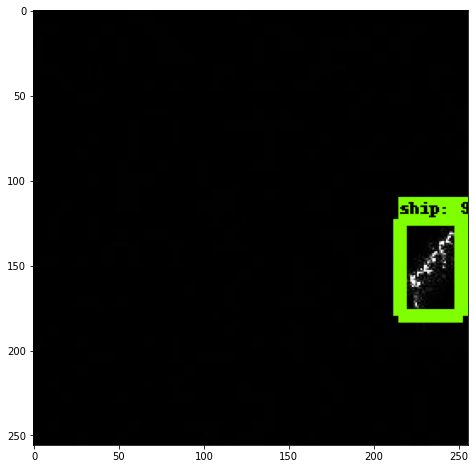

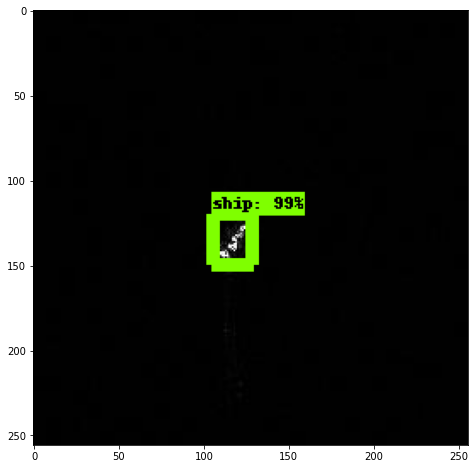

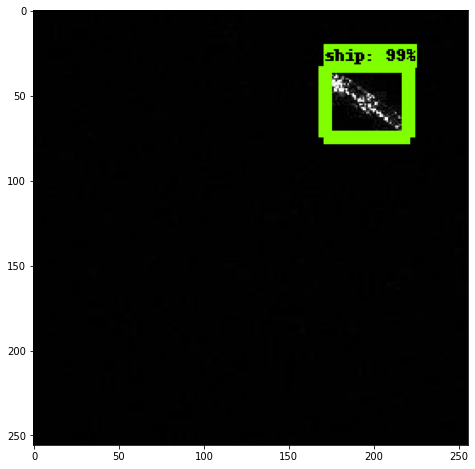

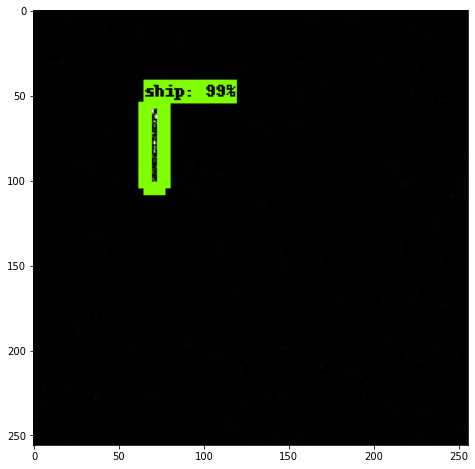

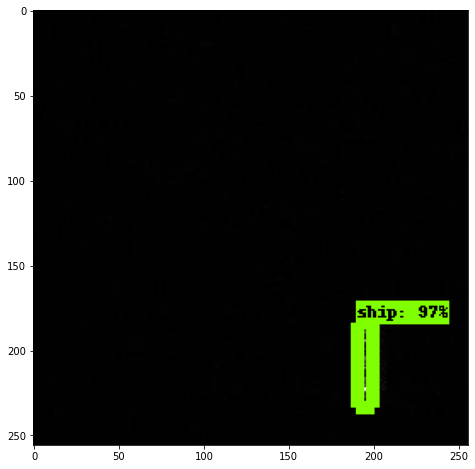

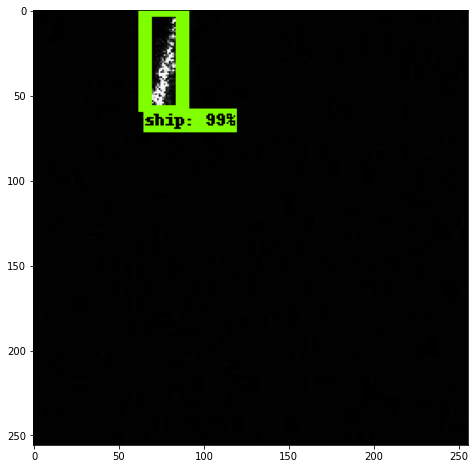

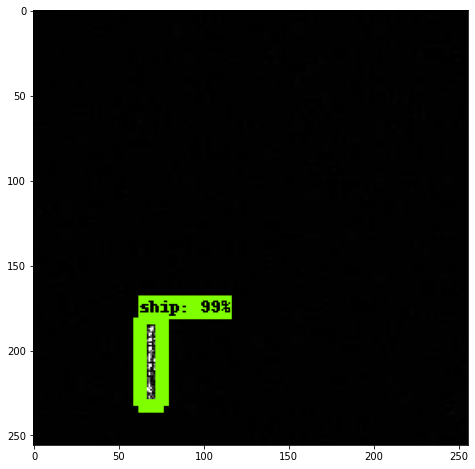

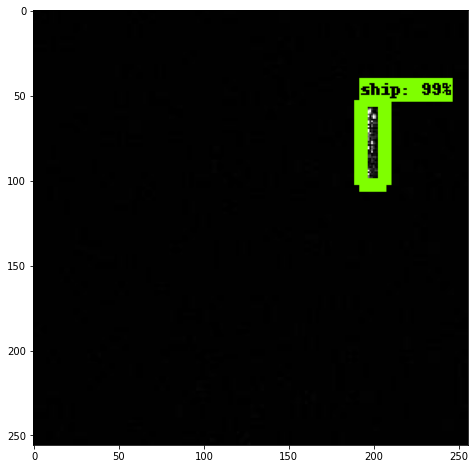

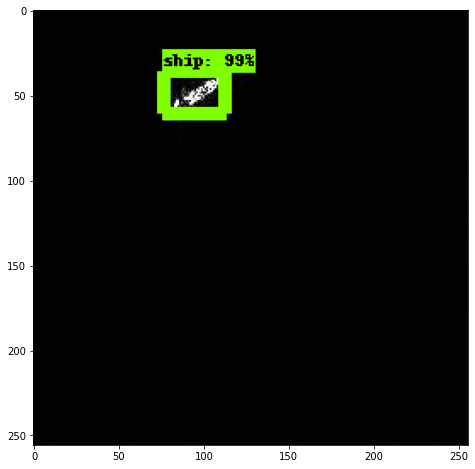

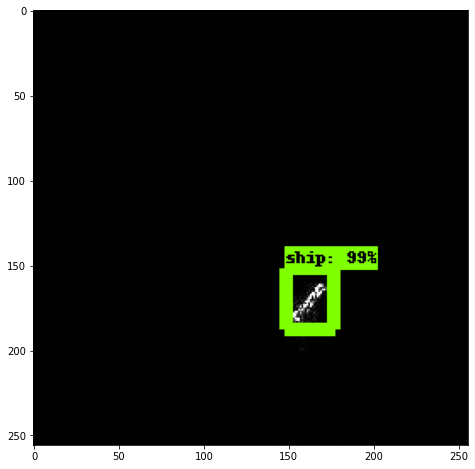

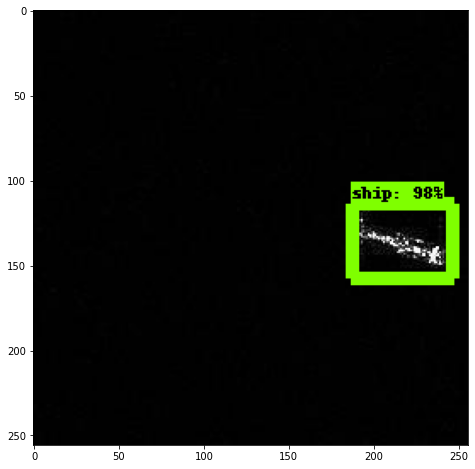

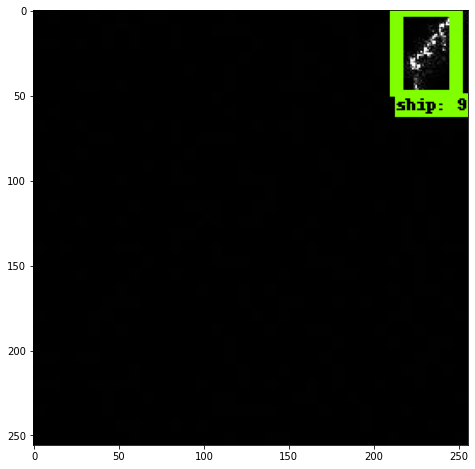

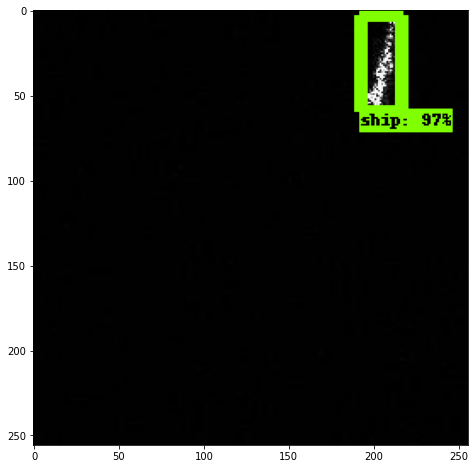

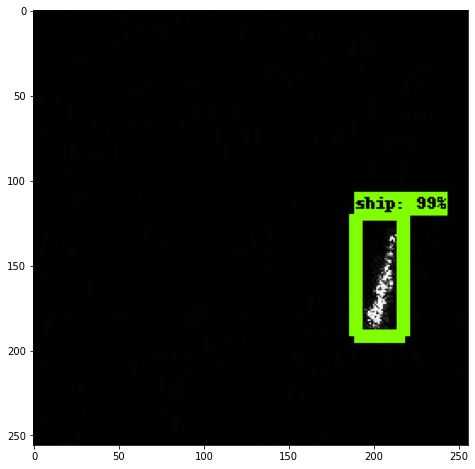

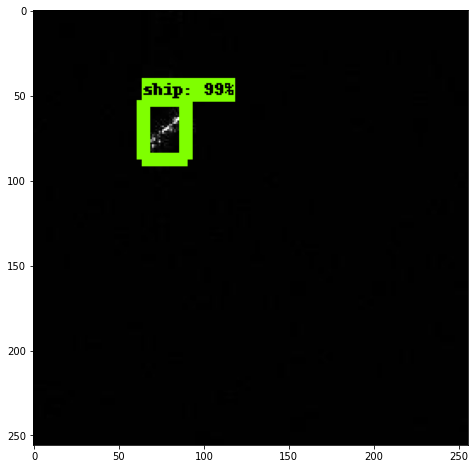

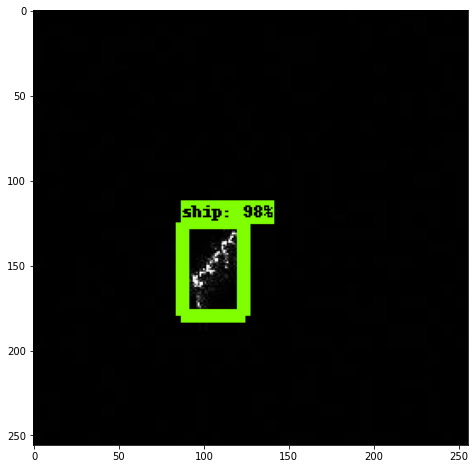

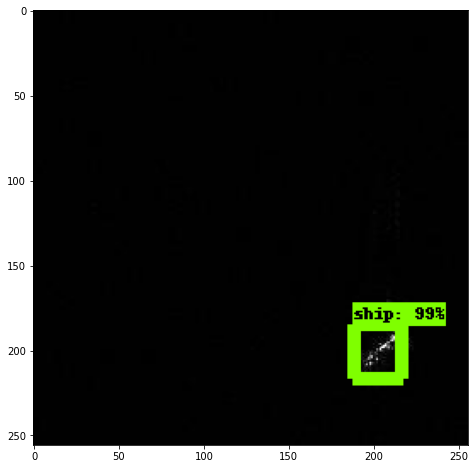

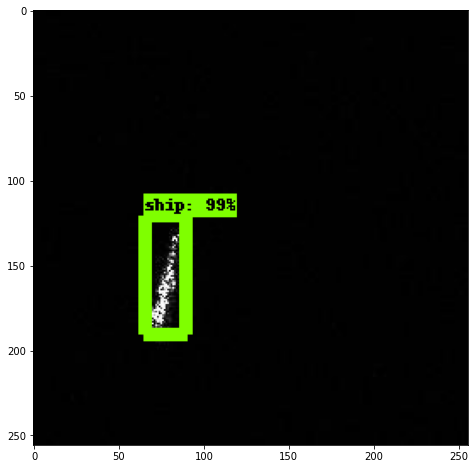

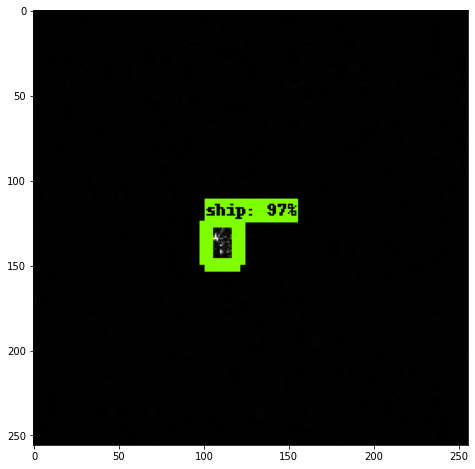

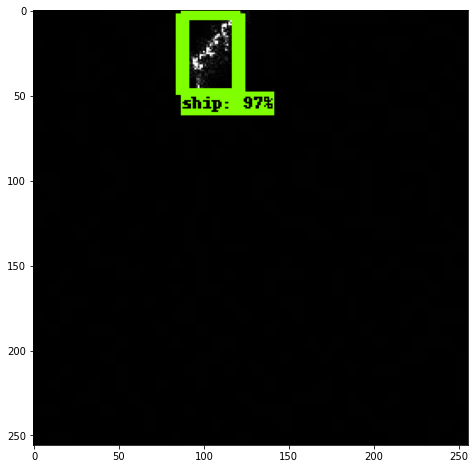

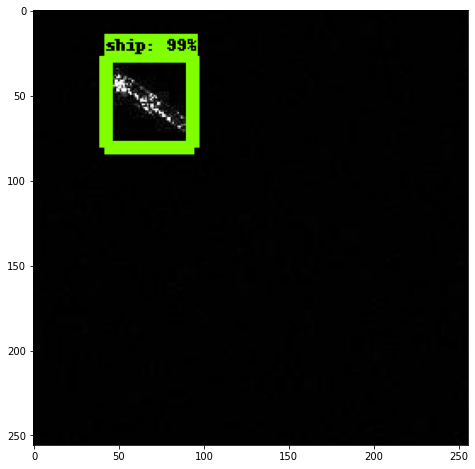

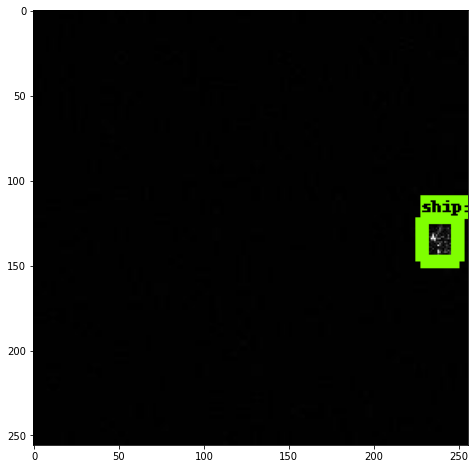

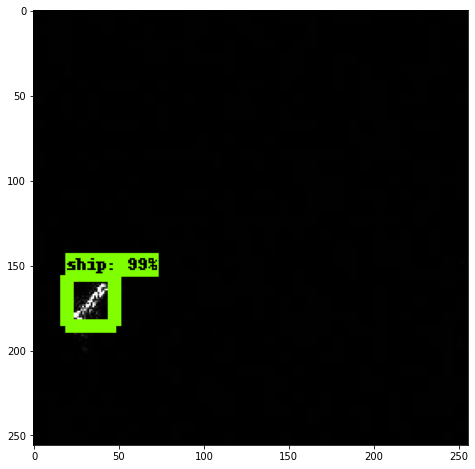

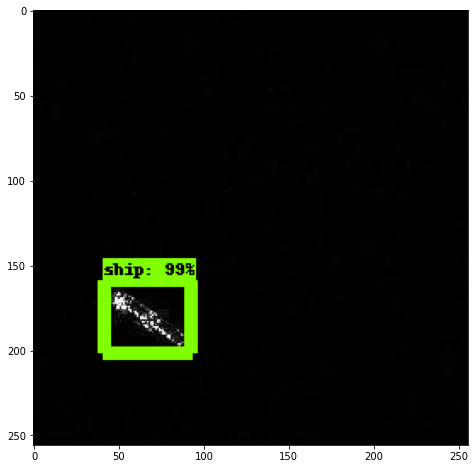

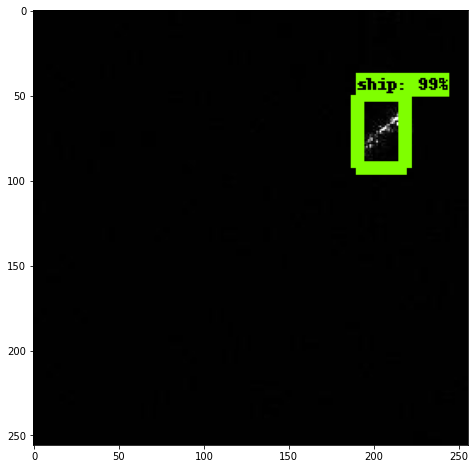

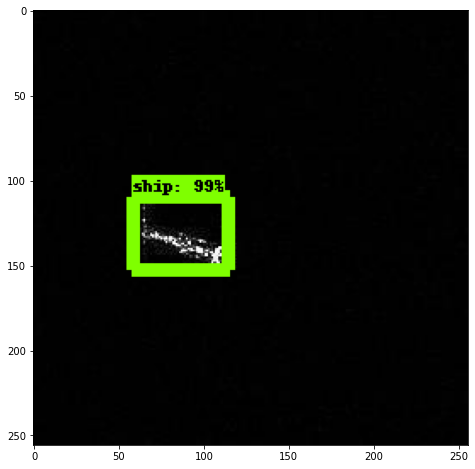

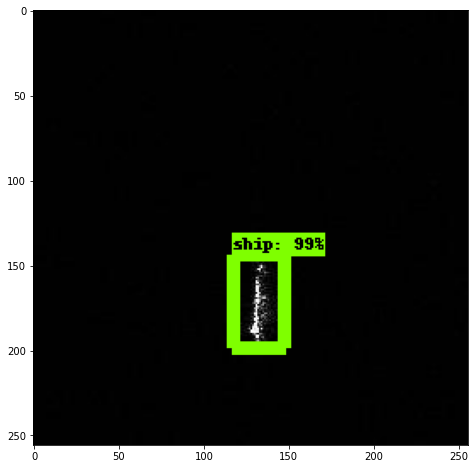

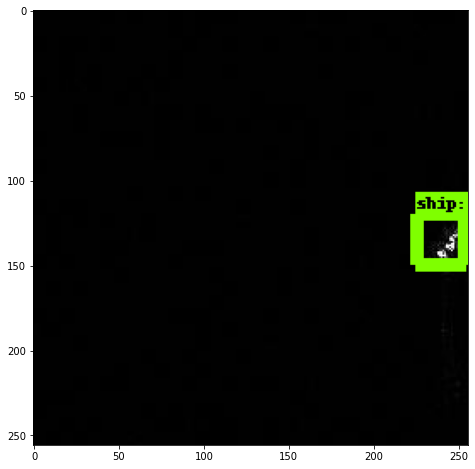

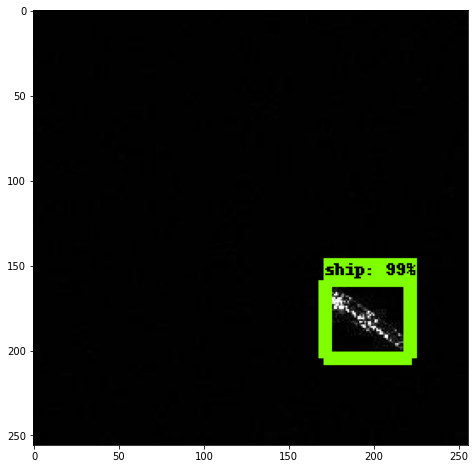

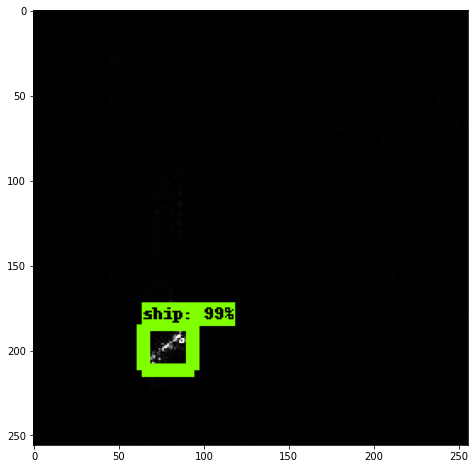

In [25]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

num_classes = 3

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)